<a href="https://colab.research.google.com/github/VorobyvEgor/Seminar_Sber/blob/main/Projects/%D0%95%D0%B3%D0%BE%D1%80_%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2_%5BTemplate%5D_%D0%93%D1%80%D1%83%D0%BF%D0%BF%D0%BE%D0%B2%D0%BE%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82__%D0%9F%D0%B5%D1%80%D0%B2%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 
plt.rcParams['figure.figsize'] = [13, 8]

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии (**N декабря в M часов**).  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1IJRb8SGiHm2BnjQ-MJXXFrzzjCUf1FhCCG6QDHDPin0/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите мне (@azukhba). 


## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1jN8W_OQWm2Wryvn6rrSm58no679X_be_/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_data.csv to netflix_data.csv


In [3]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv("netflix_data.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [23]:
data.shape

(496, 5)

In [7]:
data.sample(10)

,title,rating,ratingLevel,release year,user rating score
819,Delhi Safari,PG,"violence and menacing action, rude humor, sugg...",2012,NaN
965,Back to the Secret Garden,G,General Audiences. Suitable for all ages.,2002,NaN
533,Kong: King of the Apes,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,2016,NaN
910,Cats & Dogs,PG,animal action and humor,2001,NaN
263,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
120,Documentary Now!,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,NaN
74,Black Mirror,TV-MA,For mature audiences. May not be suitable for...,2016,80.0
150,The Brothers,R,strong sexual content and language,2001,NaN
947,The Land Before Time XIV: Journey of the Brave,G,General Audiences. Suitable for all ages.,2016,NaN
841,The Mr. Peabody and Sherman Show,TV-Y7,Suitable for children ages 7 and older,2017,NaN


Удалите из данных дупликаты. 

In [21]:
data.drop_duplicates(subset='title',inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              496 non-null    object 
 1   rating             496 non-null    object 
 2   ratingLevel        464 non-null    object 
 3   release year       496 non-null    int64  
 4   user rating score  254 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 43.2+ KB


In [22]:
data.shape

(496, 5)

In [28]:
data.columns

Index(['title', 'rating', 'ratingLevel', 'release year', 'user rating score'], dtype='object')

Сколько рейтинговых групп представлено в данных?

In [25]:
data.ratingLevel.nunique()

98

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

Text(0.5, 1.0, 'Количество оценкок пользователей')

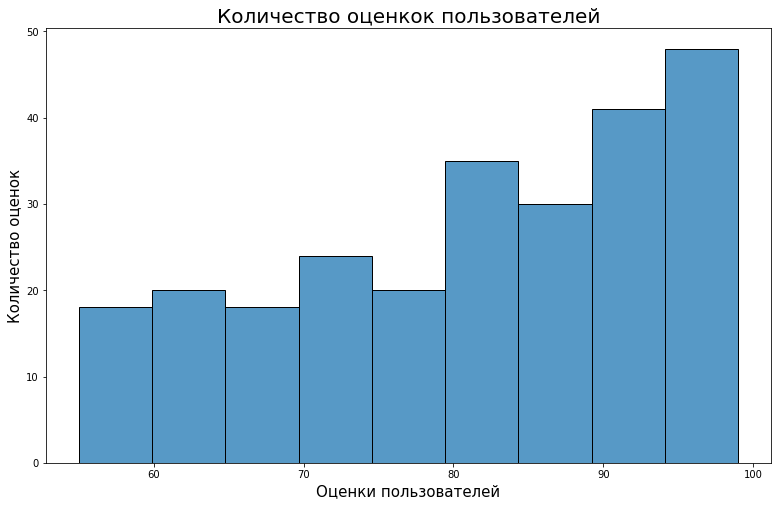

In [101]:
sns.histplot(x='user rating score', data=data);
plt.xlabel('Оценки пользователей', fontdict={'fontsize': 15, 'fontweight':10})
plt.ylabel('Количество оценок', fontdict={'fontsize': 15, 'fontweight':10})
plt.title('Количество оценкок пользователей', fontdict={'fontsize': 20, 'fontweight':10})

In [40]:
rating = data.groupby('user rating score').title.count()

Text(0.5, 1.0, 'Топ 10 оценок пользователей по количеству')

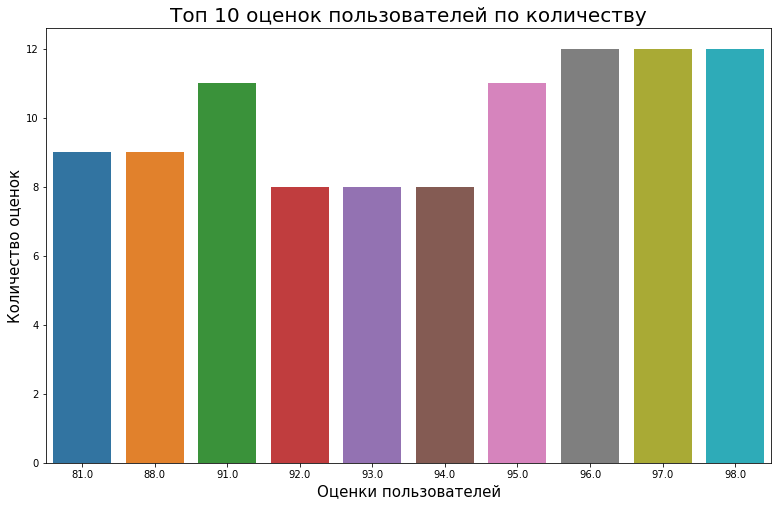

In [102]:
top_rating = rating.sort_values(ascending=False).index[:10]
sns.countplot(x='user rating score', data=data[data['user rating score'].isin(top_rating)])
plt.xlabel('Оценки пользователей', fontdict={'fontsize': 15, 'fontweight':10})
plt.ylabel('Количество оценок', fontdict={'fontsize': 15, 'fontweight':10})
plt.title('Топ 10 оценок пользователей по количеству', fontdict={'fontsize': 20, 'fontweight':10})

***Вывод:*** ...

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
...

***Ответ:*** ...

В какие годы были запущены шоу, представленные в датасете?

In [ ]:
...

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

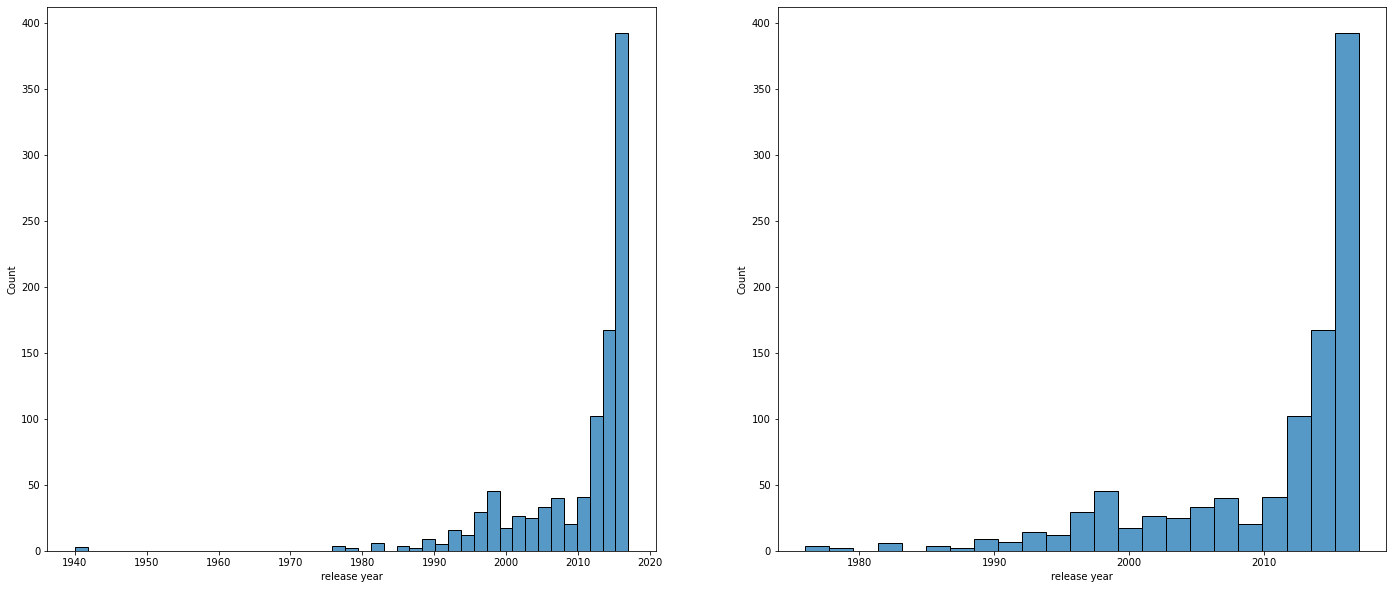

In [23]:
fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=(24, 10))
sns.histplot(x='release year', data=data, ax=ax1[0])
sns.histplot(x='release year', data=data[data['release year'] >= 1970], ax=ax1[1])

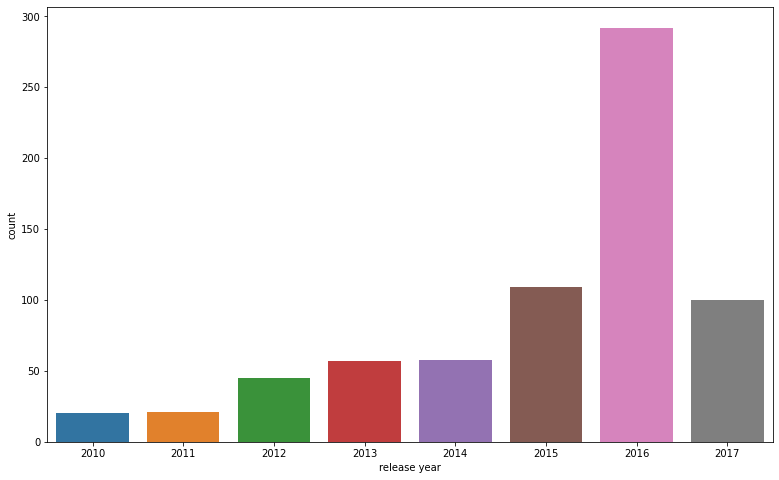

In [26]:
sns.countplot(x='release year', data=data[data['release year'] >= 2010])

Теперь посмотрим на выброс.

***Вывод:*** ...

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [ ]:
...

***Вывод:*** ...

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:
...

***Вывод:*** ...

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
...

***Вывод:*** ...